# <font color='red'> DSCI 511 - Final Project | Group #1 </font>
### Team Members:
- Member 1
    - Name: Joseph Trybala
    - Email: jjt336@drexel.edu
- Member 2
    - Name: Manas Bharadwaaj Subramanian
    - Email: msb357@drexel.edu
- Member 3
    - Name: Miko Wieczorek
    - Email: mw3459@drexel.edu
- Member 4
    - Name: Ritu Kukreja
    - Email: rk977@drexel.edu

## <font color='red'> Purpose of this Notebook </font>

This notebook imports the data_processing.py and data_viz.py scripts to put together our final dataset and also show an interesting plot of our selected healthcare companies' daily stock price versus the COVID-19 infection and vaccination daily cases. The notebook is divided into the following sections:

- Finance Section - This section describes the companies we have selected for our dataset, their relevance, and the categories they're stratified into.
- COVID Section - This section shows the sources for our COVID-19 dataset and the timeline for the cases. 
- Stock Data Acquisition and API Interface
- Stock Data from File
- COVID Data from File
- Merge dataframes
- Save final dataset
- Visualizing stock trends and COVID-19 cases

##  <font color='orange'> Finance Section  <font color='orange'>

When working on the projects we had to consider two main questions:
- Which companies do we find relevant?
- What categories can we put them under?

The following ([Link](https://www.marketbeat.com/stocks/sectors/medical/
)) shows us some of the important companies we can consider. We then segregate them into Health Insurance Companies and Pharmaceutical Companies. 

### Health Insurance Companies
*   Anthem, ANTM
*   UnitedHealth Group, UNH
*   Cigna, CI
*   MetLife, MET
*   Aetna, AET

### Pharmaceutical Companies
*   Novartis, NVS
*   Pfizer, PFE
*   Johnson & Johnson, JNJ
*   Merck & Co., MRK
*   Moderna, MRNA
*   BioNTech, BNTX
*   AbbVie, ABBV

What timeline are we considering?

December 2019 is the recognized month of first infection for COVID 19. In order to properly view the Stock Market under pandemic conditions, we needed a relevant control. In that spirit, we looked at the timeline of available Covid-19 data and determined the length, we also took the same length of time before covid to serve as said control. Namely, our data contains data between the end of 2016 and the end of 2022.



## <font color='orange'> Covid Section </font>

We have two data sets we can consider each having taken from kaggle. These datasets have their own sources from which they're curated. Additionally, both datasets utilitze date-region pair format for the relevant data

- ([Dataset 1](https://github.com/GoogleCloudPlatform/covid-19-open-data/blob/main/docs/table-epidemiology.md
))
- ([Dataset 2](
https://github.com/GoogleCloudPlatform/covid-19-open-data/blob/main/docs/table-vaccinations.md
))




In [1]:
#prep including imports and directory specification
import requests
from pprint import pprint
import json
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## comment out if not running in google colab
from google.colab import drive


In [2]:
## comment out if not running in google colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## comment out if not running in google colab

## make sure to have this directory in your 'MyDrive'
os.chdir('drive/MyDrive/DSCI511/Project/final_project')
#os.getcwd()

In [4]:
## import custom functions
import python.data_processing as dp
import python.data_viz as dv

## define input and output data directories
in_path = "data/rawdata"
out_path = "data/processed"

In [5]:
## create these directories if they don't already exisit
if not os.path.exists(in_path):
  os.makedirs(in_path)

if not os.path.exists(out_path):
  os.makedirs(out_path)

## <font color='orange'> Stock Data Acquisition and API Interface </font>

In [6]:
x = False
y = False

symbols = ['ANTM','UNH','CI','MET','AET']
allstock_df1 = dp.retrieve_stock_data(symbols, x, y)

symbols = ['NVS','PFE','JNJ','MRK']
allstock_df2 = dp.retrieve_stock_data(symbols, x, y)

symbols = ['MRNA','BNTX','ABBV']
allstock_df3 = dp.retrieve_stock_data(symbols, x, y)

allstock_df = pd.concat([allstock_df1, allstock_df2, allstock_df3], ignore_index=True)

In [7]:
allstock_df.to_csv(os.path.join(in_path, 'fullstockdata.csv'), index=False)  

## <font color='orange'> Stock Data from File </font>

In [8]:
####################################################################################################################################################################################
                                                                               #Stock data from file
####################################################################################################################################################################################
allstock_df = pd.read_csv(os.path.join(in_path, 'fullstockdata.csv'))
allstock_df = allstock_df[::-1]
newstock_df = dp.process_stock_data(allstock_df)
newstock_df.head()

key dataframe added


,ABBV open,AET open,ANTM open,BNTX open,CI open,JNJ open,MET open,MRK open,MRNA open,NVS open,PFE open,UNH open,dt,month
date,,,,,,,,,,,,,,
2016-11-01,56.00,107.71,122.440,NaN,119.55,114.76,47.16,59.00,NaN,71.34,30.94,141.51,2016-11-01,Nov-16
2016-11-02,56.46,105.89,117.765,NaN,115.59,115.52,46.56,59.06,NaN,71.96,30.99,139.02,2016-11-02,Nov-16
2016-11-03,57.12,105.92,123.480,NaN,119.50,114.88,45.22,59.18,NaN,71.22,30.70,139.18,2016-11-03,Nov-16
2016-11-04,56.07,105.54,120.670,NaN,117.74,115.04,47.21,58.69,NaN,70.27,29.91,138.45,2016-11-04,Nov-16
2016-11-07,56.81,107.64,121.030,NaN,122.57,115.89,47.66,59.52,NaN,70.83,30.23,139.60,2016-11-07,Nov-16


## <font color='orange'> Important Events </font>

Major events that can be considered when studying the plot

*   First Case
*   First European case
*   First US Case
*   First Vaccine development announcement
*   First Vaccine Trial
*   First Vaccination opening



In [9]:
covid_events = pd.read_csv(os.path.join(in_path, "covid_events.csv"))
covid_events['date'] = pd.to_datetime(covid_events['date'])
covid_events = covid_events.sort_values(by='date')
covid_events

,event,label,date
0,case,First COVID-19 case,2019-12-31
2,case_us,First US COVID-19 case,2020-01-21
1,case_eu,First EU COVID-19 case,2020-01-24
5,fda_hyd,FDA EUA for hydroxychloroquine,2020-03-28
3,vac_an,First Vaccine Dev Annoucement,2020-04-01
6,fda_rem,FDA EUA for remdesivir,2020-05-01
4,vac_trial,First Vaccine Trial,2020-07-27
7,plasma,FDA EUA for convalescent plasma,2020-08-23
8,vac_open,FDA EUA for first vaccine,2020-12-11
9,vac_boost,FDA Booster approval,2021-08-12


## <font color='orange'> Covid Data from file </font>

In [10]:
epidemiology_df = pd.read_csv(os.path.join(in_path, 'epidemiology.csv'))
vaccinations_df = pd.read_csv(os.path.join(in_path, 'vaccinations.csv'))

covid_df = dp.process_covid_data(epidemiology_df, vaccinations_df)

US Only
Merged
COVID data processed


## <font color='orange'> Merge dataframes </font>

In this section we merge our dataframes and call it merged_df

In [11]:
merged_df = newstock_df.join(covid_df, how='left')
merged_df = merged_df.drop_duplicates(subset='dt', keep="first")

## <font color='orange'> Save final dataset </font>

We then proceed to save our final dataset in our repository.

In [12]:
merged_df.to_csv(os.path.join(out_path, "covid_stock_dataset.csv"), index=False)

In [13]:
merged_df['dt'] = pd.to_datetime(merged_df['dt'])
merged_df.set_index('dt', inplace=True)

In [14]:
merged_df.head()

,ABBV open,AET open,ANTM open,BNTX open,CI open,JNJ open,MET open,MRK open,MRNA open,NVS open,...,new_vaccine_doses_administered_pfizer,cumulative_vaccine_doses_administered_pfizer,new_persons_fully_vaccinated_moderna,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen
dt,,,,,,,,,,,,,,,,,,,,,
2016-11-01,56.00,107.71,122.440,NaN,119.55,114.76,47.16,59.00,NaN,71.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-02,56.46,105.89,117.765,NaN,115.59,115.52,46.56,59.06,NaN,71.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-03,57.12,105.92,123.480,NaN,119.50,114.88,45.22,59.18,NaN,71.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-04,56.07,105.54,120.670,NaN,117.74,115.04,47.21,58.69,NaN,70.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-07,56.81,107.64,121.030,NaN,122.57,115.89,47.66,59.52,NaN,70.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <font color='orange'> Visualizing stock trends and COVID-19 cases </font>

<Figure size 432x288 with 0 Axes>

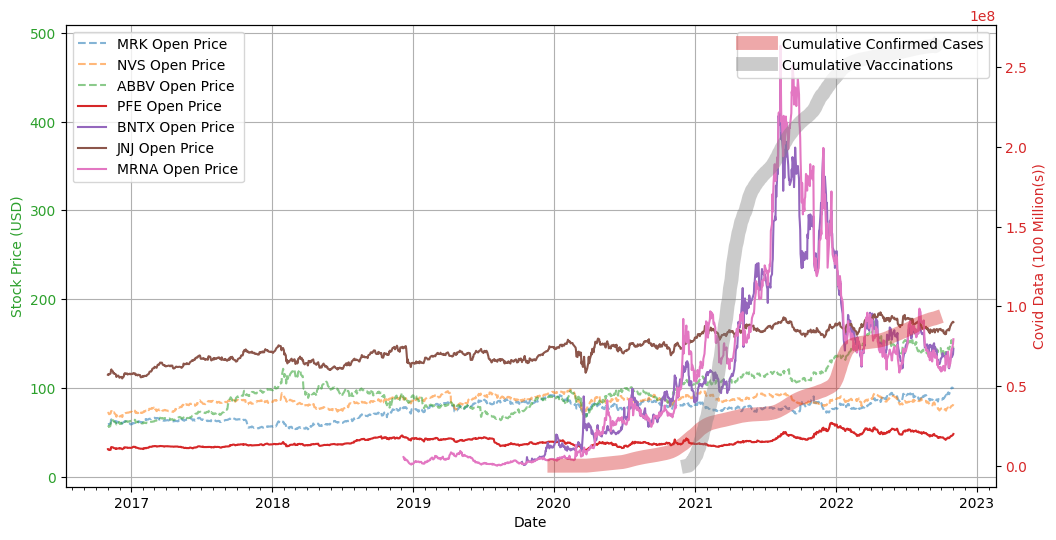

In [15]:
plot = dv.plot_data(merged_df)
plot.savefig(os.path.join(out_path, "trend_figure_pharma.png"), dpi = 600)